In [3]:
from Trajectory import * 
from Cell_gene_selection import *
warnings.filterwarnings('ignore')

## Load data:

In [4]:
#If you already have gene_expression and annotation of data, use the below functions.

path_dataset='Datasets/'  #Path to read datasets
name_dataset='visium_sub' #Name of the data set, please look at the Dataset folder, for each data set we need to split data
path_to_results=set_path_for_results(name_dataset) #set the path for results
annot=load_annot(path_dataset,name='annot_data_'+name_dataset)  #Load annot data.
data=load_expression(path_dataset,name='gene_expression_'+name_dataset) #Load expression data


The path has already been set.


## Cluster representations by estimating regularized probability distributions of cell types per sample:

In [5]:
Clu_rep = Cluster_Representations(annot,regulizer = 0.1,regularization=True) # Regularization

##  Calcuating  cost matrix between clusters:

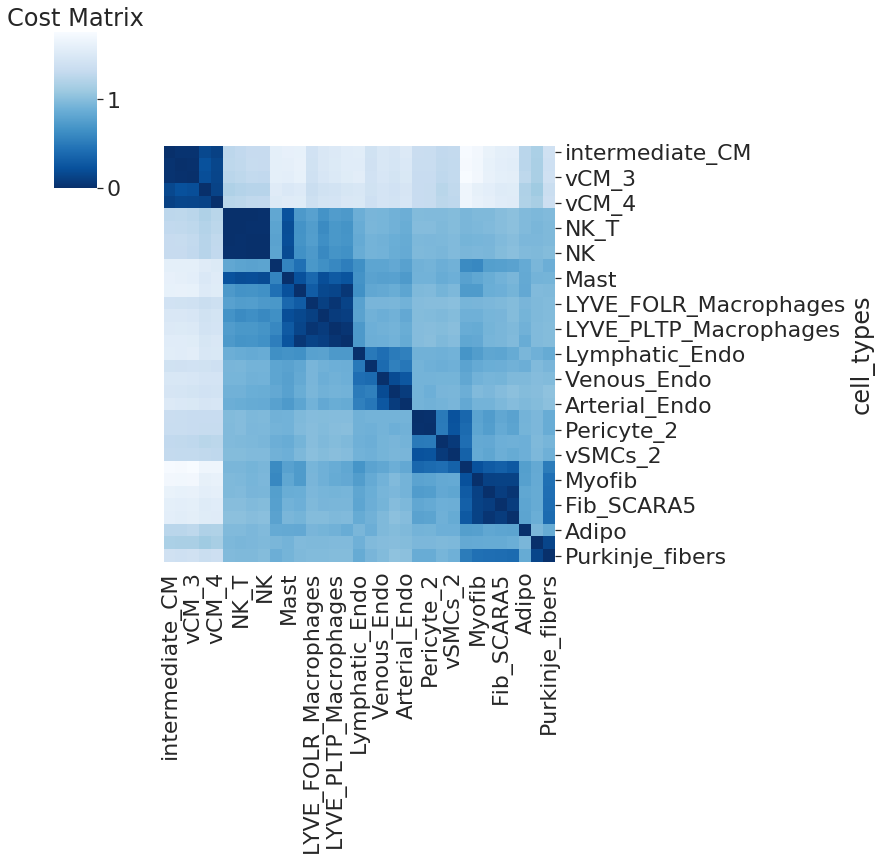

In [7]:
dis= cost_matrix(annot, data,path_to_results,cell_col = 0)

# Estimate the Wasserstein distance:

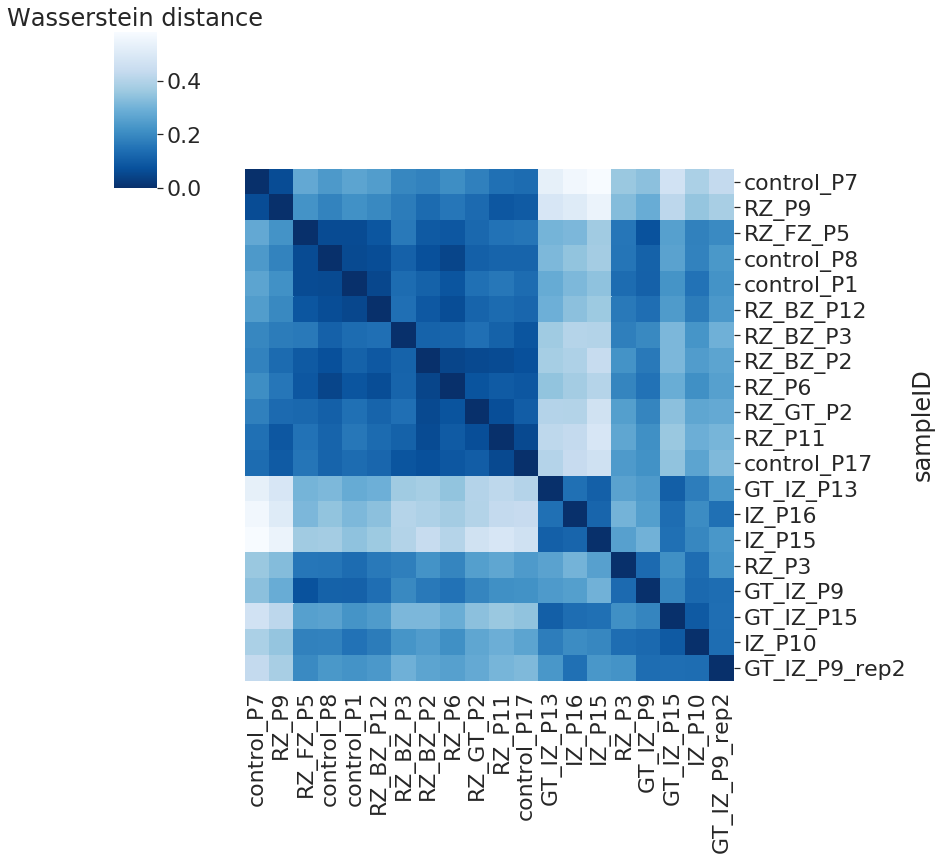

In [8]:
EMD = wasserstein_d(Clu_rep,dis/dis.max(),regularized = 'unreg',path = path_to_results)

## Evaluation:

Cluster labels:  ['control' 'IZ']
ARI:  0.9
Silhouette score:  0.7392560937271608


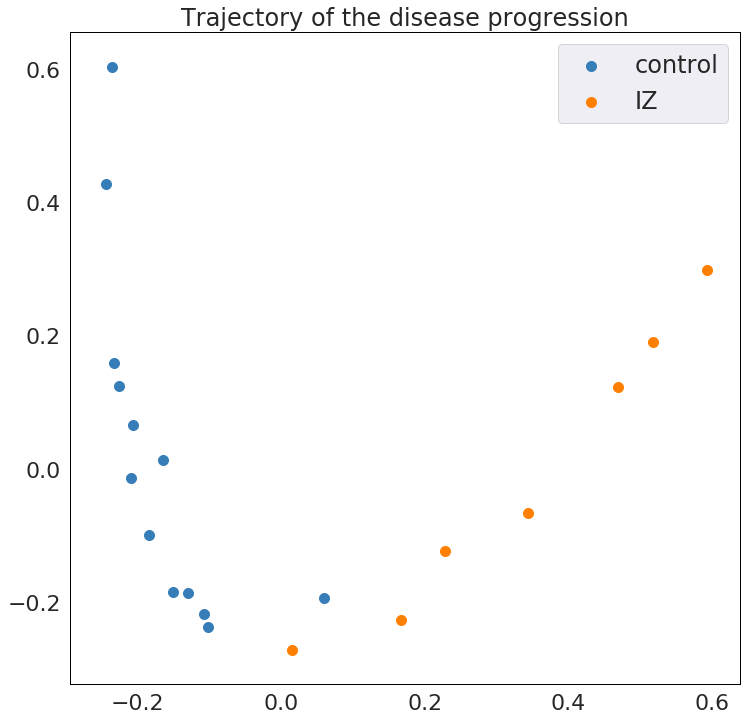

In [10]:
# Computing ARI
predicted_labels, ARI, real_labels = Clustering(EMD/EMD.max(), annot,category ='status', sample_col=1, res = 0.01)
#Computing Sil
Silhouette = Sil_computing(EMD/EMD.max(), real_labels, metric = 'cosine',space = 'diffusion')

#Drawing diffusion map
embedding_diff=trajectory(EMD/EMD.max(), predicted_labels, annot, embed_coord = 'diffusion',path = path_to_results,label_act=False,location_labels='best')


#  Cell-type importance

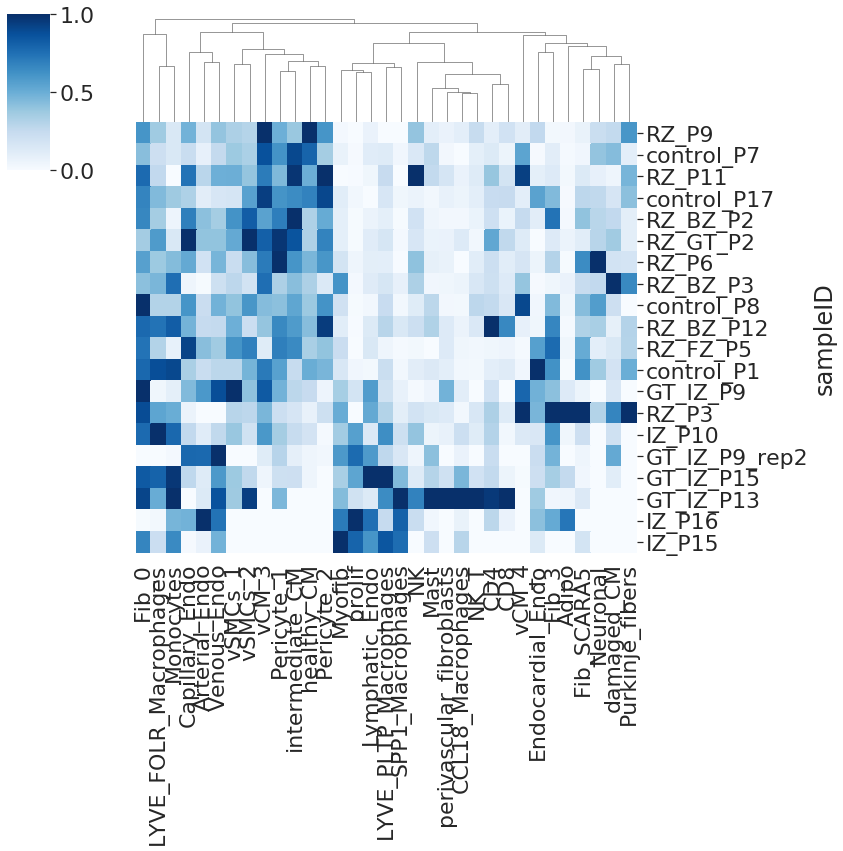

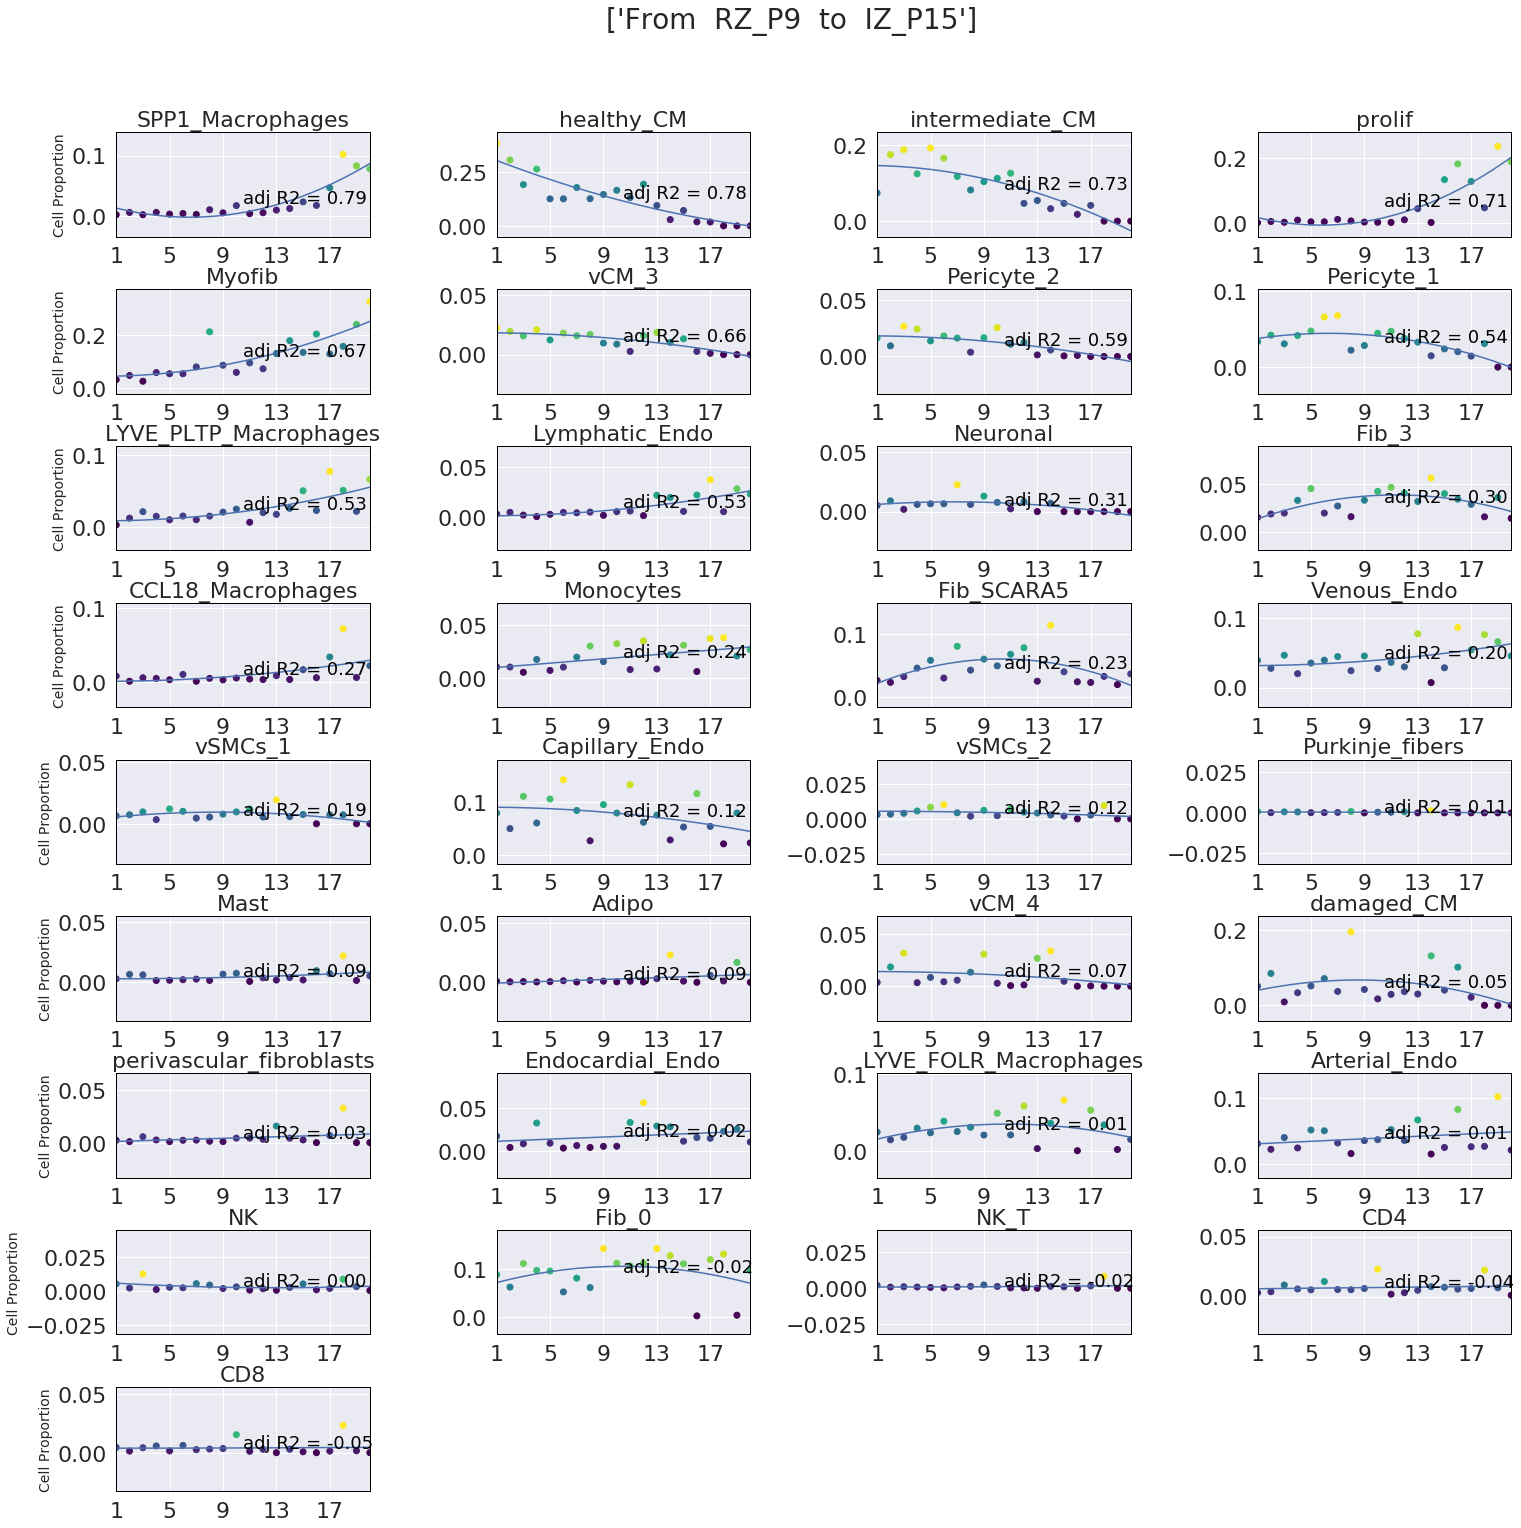

In [11]:
orders,cell_names=Cell_importance(Clu_rep,annot,embedding_diff,real_labels,path=path_to_results,sort_axis='emb_x',width=30,height=35,xlim=4,p_val=1)

## Extract gene expressions from Original object :
This step extract genes associated with each cell_type (your insterested cells) and map them with the obtained time by PILOT (based on the Trjaectory order of Samples).
For Tutorial you can ignore this and go to next step, gene selection, we already provided with you the cells folder, just extract them!). 

* You need to set  names of columns that show cell_types/clusters and Samples/Patinets in your object.

* The function "extract_cells_from_gene_expression"  automatically creates a cells folder and put the extracted genes_expression associate with each cell

* Cell_list includes list of your interested cell_types/clusters.


In [ ]:
path='path_original_object(h5ad)'
name='name of the object'
adata=load_object(path,name) #load the h5ad file
extract_cells_from_gene_expression(adata,orders,sample_col='patient_region',col_cell='cell_type_original',cell_list=cell_names,path_results=path_to_results)

## Read x and y genes of Chromosomes to filter them:
* Note: We also removed chromosomes genes before gene selection.

In [ ]:
x_y_genes=pd.read_csv('Datasets/Chromosome_x_and_y.csv')
x_y_genes=x_y_genes.dropna()
filtered_names=list(x_y_genes['Gene name'])

#  Gene selection:

###  Healthy_CM cell_type

Name of Cell type : healthy_CM
sparsity:0.6932279564364608
For this cell_type, p-value of  3011 genes are statistically significant.
           Expression pattern  count
4    linear up quadratic down   1245
2    linear down quadratic up    557
0                 linear down    523
3                   linear up    314
6              quadratic down    256
7                quadratic up    106
1  linear down quadratic down      8
5      linear up quadratic up      2
data saved successfully
 Plots for interesting genes: 


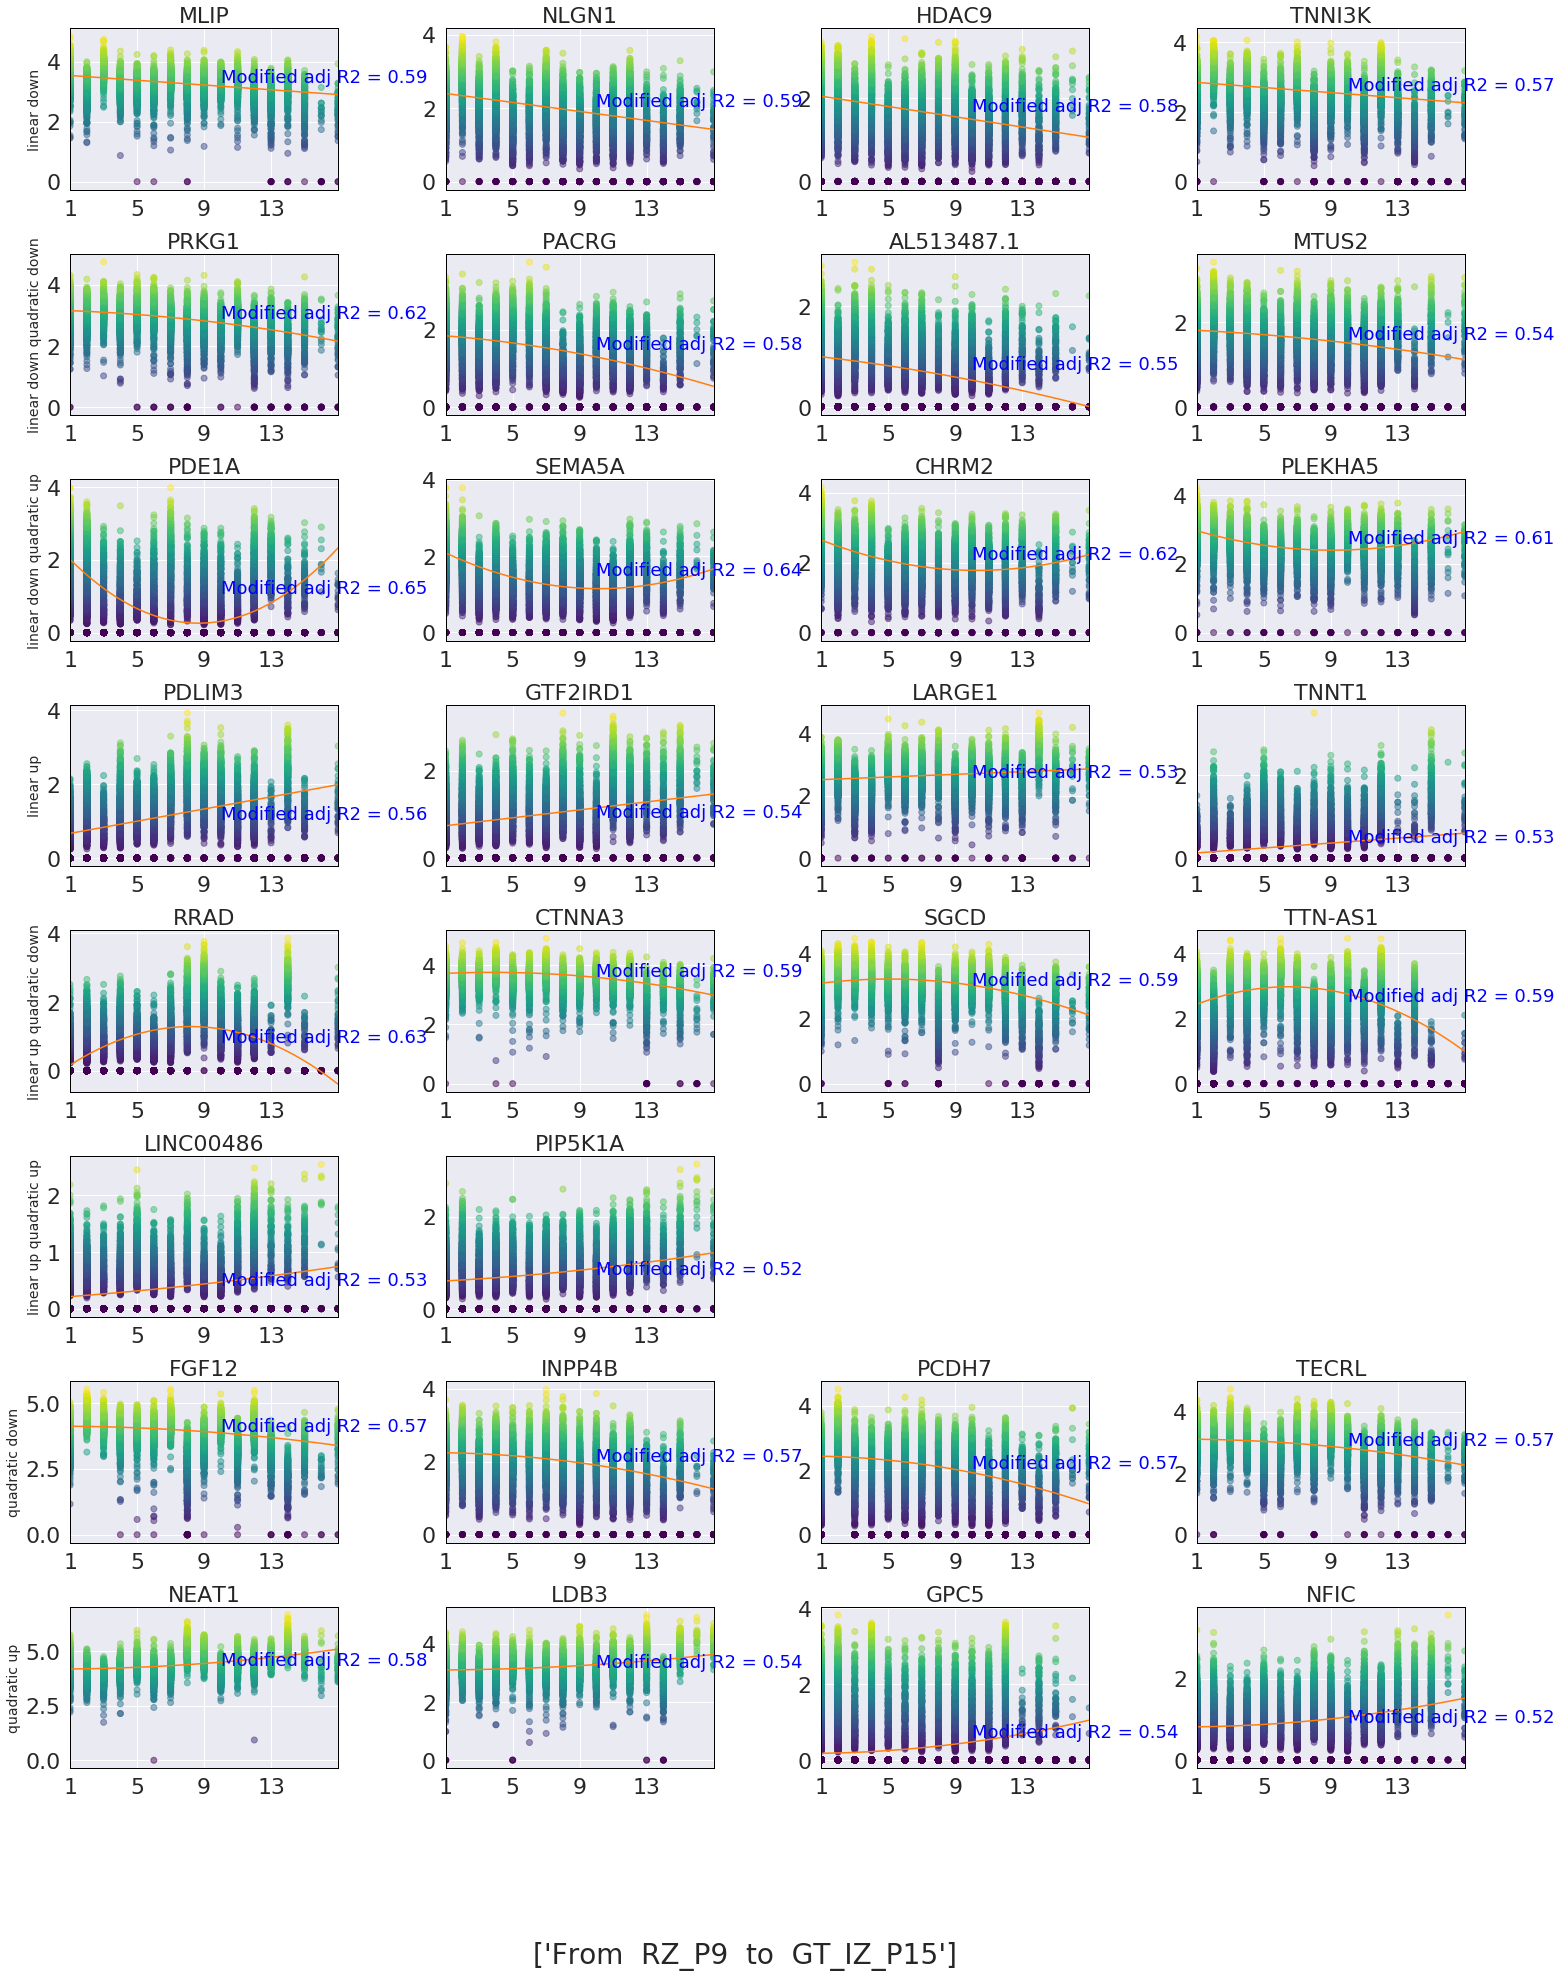

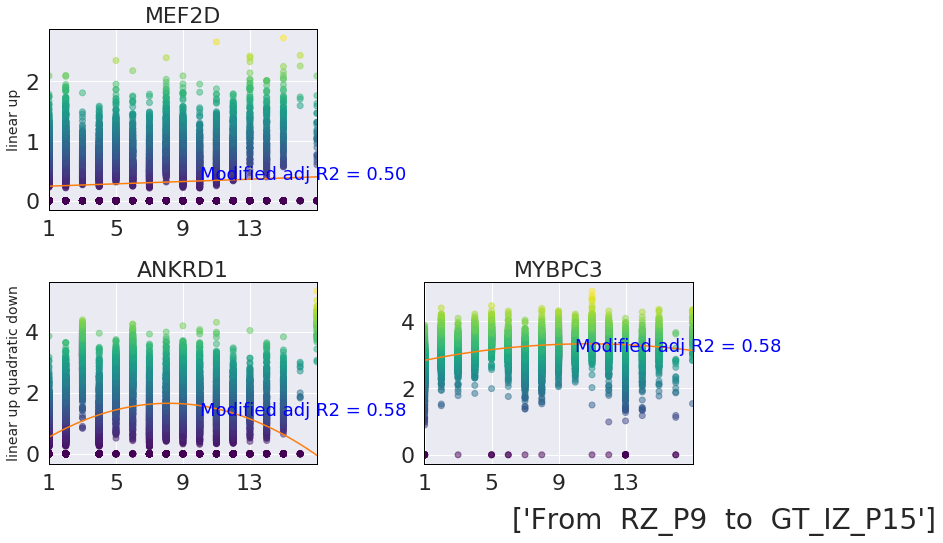

In [12]:
cell_n=cell_names[1] 
data =loadTarget(path_to_results+'/cells/', cell_n)
data=data[data.columns[~data.columns.isin(filtered_names)]] #remove x and y genes
pro=proportions(data)  #Caculate the proportion of Zero for genes
fiternames_pro=list(pro[pro['proportion']> 0.95]['Gene ID']) #Filter genes with high probability zero fraction
data=data[data.columns[~data.columns.isin(fiternames_pro)]]


genes_importance(pro,data,path=path_to_results,name_cell=cell_n,col='Time_score',genes_index=list(range(2, data.shape[1])),p_value=0.01,max_iter_huber=500,epsilon_huber=1.35,genes_interesting=[])


### Myofib cell-type

Name of Cell type : Myofib
sparsity:0.8275345974980163
For this cell_type, p-value of  712 genes are statistically significant.
           Expression pattern  count
5              quadratic down    197
4    linear up quadratic down    192
2    linear down quadratic up    142
0                 linear down    119
6                quadratic up     28
3                   linear up     20
1  linear down quadratic down     14
data saved successfully


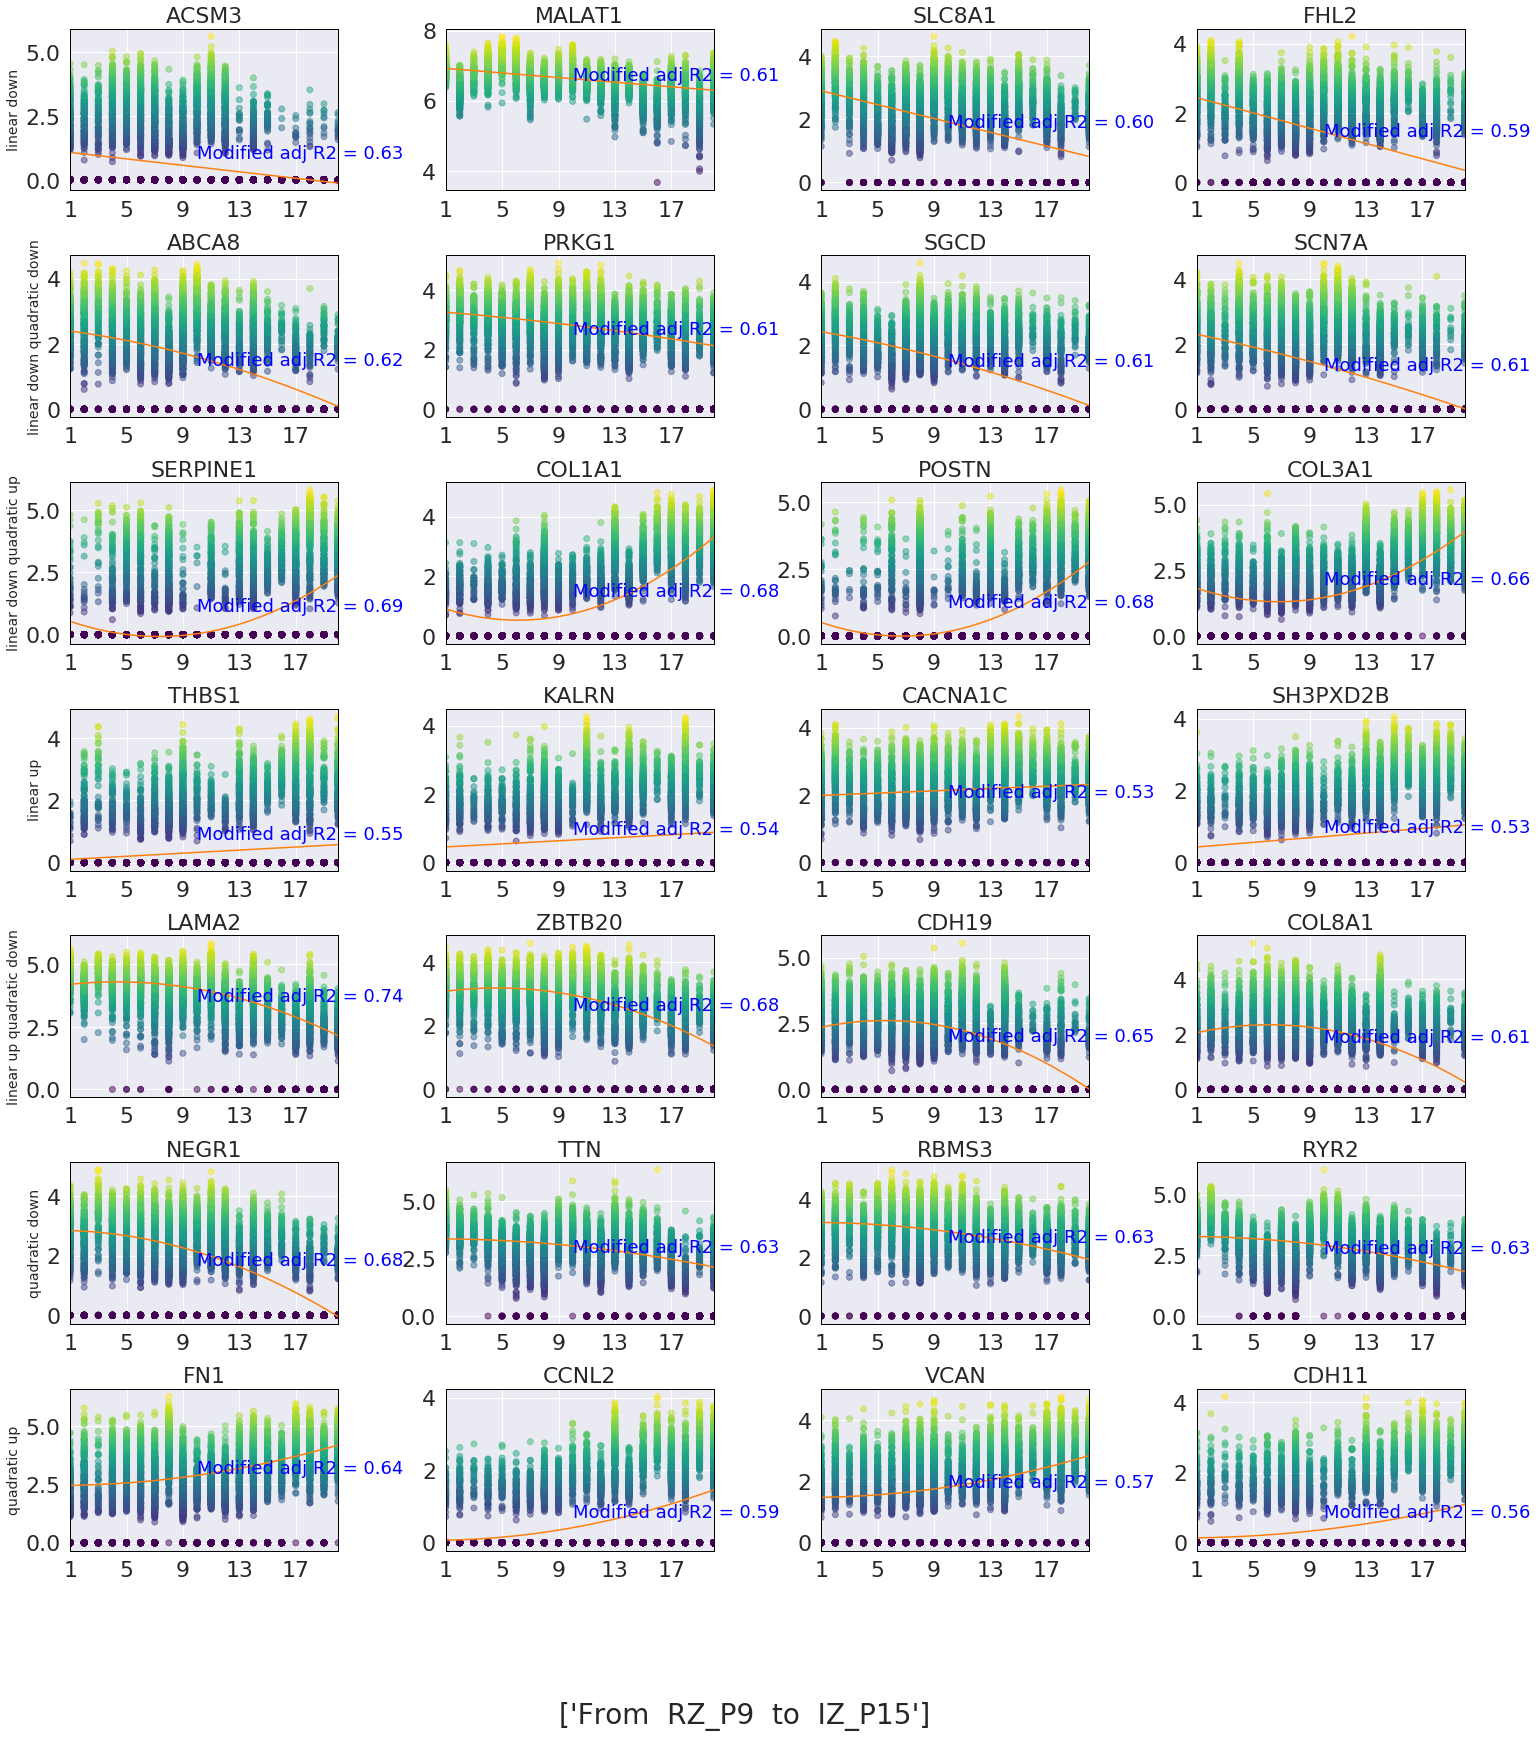

In [15]:
cell_n=cell_names[4]
data =loadTarget(path_to_results+'/cells/', cell_n)

data=data[data.columns[~data.columns.isin(filtered_names)]]
pro=proportions(data)
fiternames_pro=list(pro[pro['proportion']> 0.95]['Gene ID'])
data=data[data.columns[~data.columns.isin(fiternames_pro)]]

genes_importance(pro,data,path=path_to_results,name_cell=cell_n,col='Time_score',genes_index=list(range(2, data.shape[1])),p_value=0.01,max_iter_huber=500,epsilon_huber=1.35,genes_interesting=[])
